# Part 3: regression

In [1]:
import matplotlib.pyplot as plt
from step_02_load_data.main import load
from step_03_clean_data.clean import clean
from step_04_feature_engineering.feature_engineering import feature_engineering_0
import step_05_compute_models.xgboost_experiments
import step_05_compute_models.linear_regression_experiments
import step_05_compute_models.random_forest_experiments

import pandas as pd
import numpy as np

/home/dimi/miniconda3/envs/scrapping/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## load and clean the data

In [2]:
df=load()
df=clean(df)


In [3]:
df.loc['rent'].head()

Target         Group 1                            Group 2            \
         Price Number of rooms Living Area Fully equipped kitchen Furnished   
Id                                                                            
1610665  485.0             1.0        40.0                   True     False   
2718948  790.0             2.0       140.0                   True     False   
3229637  900.0             3.0       103.0                  False     False   
3860205  520.0             2.0        50.0                   True     False   
4141598  760.0             1.0        55.0                   True     False   

                                                                         \
        Open fire Terrace Area of the terrace Garden Area of the garden   
Id                                                                        
1610665     False   False                 0.0  False                0.0   
2718948     False   False                 0.0  False                0.0   
3229637     False   False                 0.0   True              330.0   
3860205     False   False                 0.0  False                0.0   
4141598     False    True                30.0   True            10000.0   

                                                             \
        Surface of the land Number of facades Swimming pool   
Id                                                            
1610665                 0.0               2.0         False   
2718948                 0.0               2.0         False   
3229637               400.0               3.0         False   
3860205                 0.0               2.0         False   
4141598                 0.0               2.0         False   

                      Group 1 Spatial      Group 2       misc  
        State of the building zipcode         type   Price/m2  
Id                                                             
1610665     \nExcellentétat\n    4020       Studio  12.125000  
2718948               \nBon\n    3200  Appartement   5.642857  
3229637               \nBon\n    7020       Maison   8.737864  
3860205               \nBon\n    6900  Appartement  10.400000  
4141598       \nÀrafraîchir\n    1470  Appartement  13.818182

In [4]:
for index,row in df.iterrows():
    if index[0]=='rent':
        if (row[('misc','Price/m2')]<7) or (row[('misc','Price/m2')]>30):
            #print(row)
            df.drop(index, inplace=True)

<AxesSubplot: >

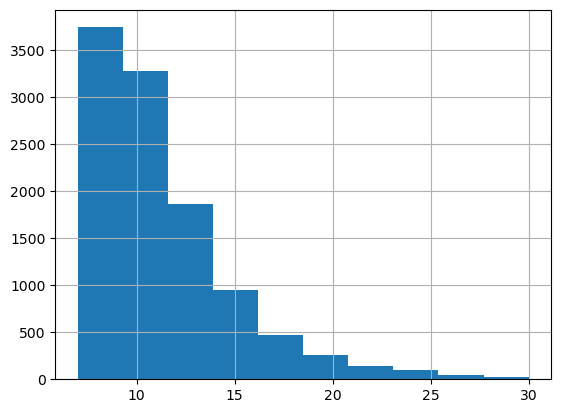

In [5]:
df.loc['rent'][('misc','Price/m2')].hist()

In [8]:
df=feature_engineering_0(df)

/home/dimi/BeCode/BeCode-real-estate-ML-cookiecutter/src/step_04_feature_engineering/feature_engineering.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(('Group 1', 'State of the building'),axis=1,inplace=True)
/home/dimi/BeCode/BeCode-real-estate-ML-cookiecutter/src/step_04_feature_engineering/feature_engineering.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(('my features', 'state note'),axis=1,inplace=True)


In [9]:
rent=df.loc['rent']
sale=df.loc['sale']

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

In [66]:
y=rent[[('Target','Price')]].to_numpy()
y=y.ravel()
X=rent[['Group 1']].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [67]:
scaler = StandardScaler().fit(X_train)
train_sc = scaler.transform(X_train)

test_sc = scaler.transform(X_test)

In [68]:
model = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data

model.fit(X_train, y_train)


RandomForestRegressor()

In [69]:
import joblib

# Save to disk
filename = 'RandomForest_rent.joblib'
joblib.dump(model, filename)


['RandomForest_rent.joblib']

In [70]:
filename = 'RandomForest_rent.joblib'
loaded_regressor = joblib.load(filename)

In [77]:
loaded_regressor.predict(np.array([[2,80]]))

array([841.0632055])